In [1]:
# import required libraries
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import random

Initial resizing to 600 x 400

In [ ]:

# Define the path of the original dataset directory
original_dataset_dir = "./leaf_dataset"

# Define the path of the new, resized dataset directory
new_dataset_dir = "./leaf_dataset_small"

# Define the new image size
new_size = (600, 400)

# Loop through each category directory
for category in os.listdir(original_dataset_dir):
    # Create the category directory in the new dataset directory
    category_dir = os.path.join(new_dataset_dir, category)
    os.makedirs(category_dir, exist_ok=True)

    # Loop through each subdirectory (i.e., "healthy" and "diseased") in the current category directory
    for sub_dir in ["healthy", "diseased"]:
        # Create the subdirectory in the new dataset directory
        sub_dir_path = os.path.join(category_dir, sub_dir)
        os.makedirs(sub_dir_path, exist_ok=True)

        # Loop through each image in the current subdirectory
        sub_dir_full_path = os.path.join(original_dataset_dir, category, sub_dir)
        for img_file in os.listdir(sub_dir_full_path):
            # Read in the original image
            img_path = os.path.join(sub_dir_full_path, img_file)
            img = cv2.imread(img_path)

            # Resize the image
            resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

            # Write the resized image to the new dataset directory
            new_img_path = os.path.join(sub_dir_path, img_file)
            cv2.imwrite(new_img_path, resized_img)


Class distributions

In [19]:
# making a df to look at exact numbers for class and subclass distribution
DATASET_DIR = './leaf_dataset_small'
categories = os.listdir(DATASET_DIR)

counts = []
for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    healthy_count = len(os.listdir(os.path.join(category_dir, 'healthy')))
    diseased_count = len(os.listdir(os.path.join(category_dir, 'diseased')))
    total_count = healthy_count + diseased_count
    counts.append([category, healthy_count, diseased_count, total_count])

df = pd.DataFrame(counts, columns=['category', 'healthy_count', 'diseased_count', 'total_count'])
print(df)

df_counts = df.copy()

                  category  healthy_count  diseased_count  total_count
0               Arjun (P1)            220             232          452
1               Jamun (P5)            279             345          624
2               Gauva (P3)            277             142          419
3              Lemon (P10)            159              77          236
4             Chinar (P11)            103             120          223
5  Alstonia Scholaris (P2)            179             254          433
6    Pongamia Pinnata (P7)            322             276          598
7               Mango (P0)            170             265          435
8         Pomegranate (P9)            287             272          559
9            Jatropha (P6)            133             124          257


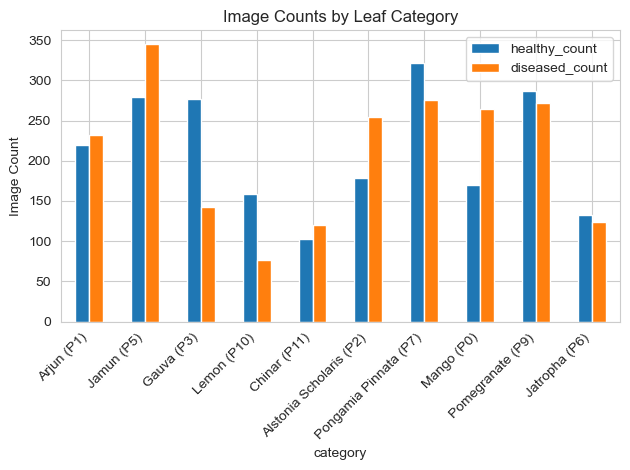

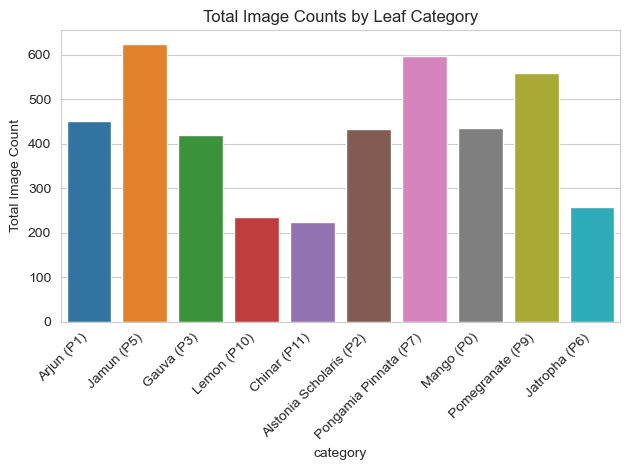

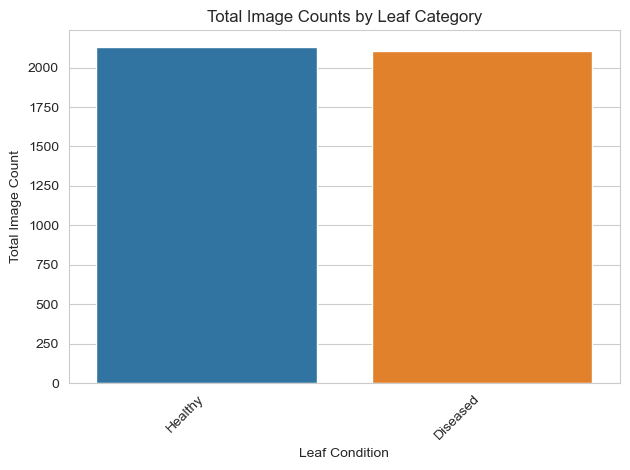

In [20]:
# plotting number of images for healthy and diseased for each class
#################
df_counts.drop("total_count", axis=1, inplace=True)
df_counts = df_counts.set_index('category')
sns.set_style("whitegrid")
ax = df_counts.plot(kind="bar", stacked=False)
ax.set_ylabel("Image Count")
ax.set_xlabel(df_counts.index.name)
ax.set_title("Image Counts by Leaf Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#################
# plotting total image count for each category
sns.set_style("whitegrid")
ax = sns.barplot(x=df['category'], y=df['total_count'])
ax.set_ylabel("Total Image Count")
ax.set_title("Total Image Counts by Leaf Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##################
# plotting healthy vs. diseased image count
# Sum the healthy and diseased counts for each category
total_health = df['healthy_count'].sum()
total_disease = df['diseased_count'].sum()

# Create a new DataFrame with the total counts
data = pd.DataFrame({'Leaf Condition': ['Healthy', 'Diseased'], 'Image Count': [total_health, total_disease]})

# Plot the data using Seaborn
sns.set_style("whitegrid")
ax = sns.barplot(x='Leaf Condition', y='Image Count', data=data)
ax.set_ylabel("Total Image Count")
ax.set_title("Total Image Counts by Leaf Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Image sizes check

In [6]:
# checking if all image sizes are the same
image_sizes = {}

for category in os.listdir(DATASET_DIR):
    category_path = os.path.join(DATASET_DIR, category)
    for subcategory in os.listdir(category_path):
        subcategory_path = os.path.join(category_path, subcategory)
        for filename in os.listdir(subcategory_path):
            filepath = os.path.join(subcategory_path, filename)
            with Image.open(filepath) as img:
                size = img.size
                if size not in image_sizes:
                    image_sizes[size] = 1
                else:
                    image_sizes[size] += 1

for size, count in image_sizes.items():
    print(f'{size}: {count} images')


(600, 400): 4236 images


All 4236 images have same resolution. No need to preprocess to make them consistent, but we may need to reduce the size by cropping or other preproccessing methods as 6000 x 4000 is really big and may not be required for ML algorithms like CNNs.

Display sample images

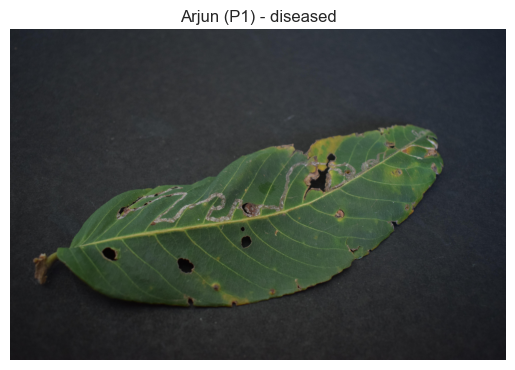

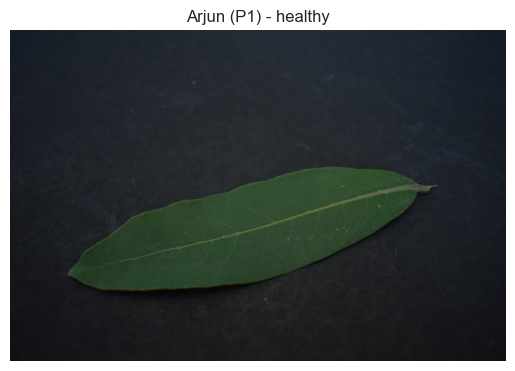

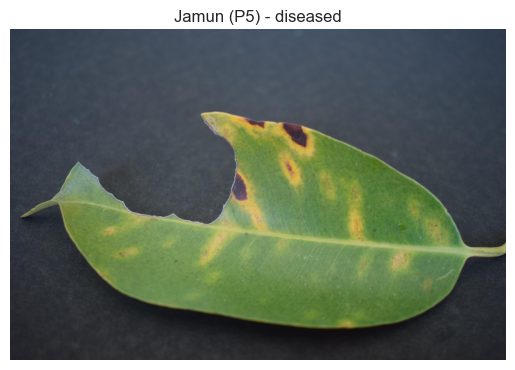

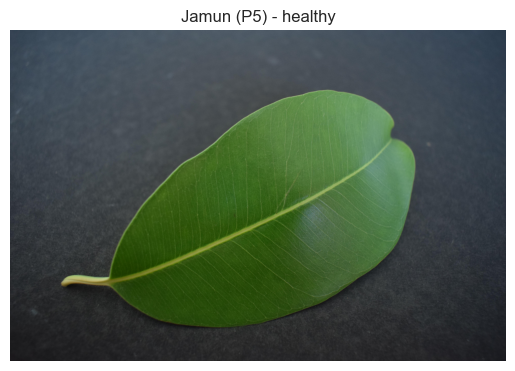

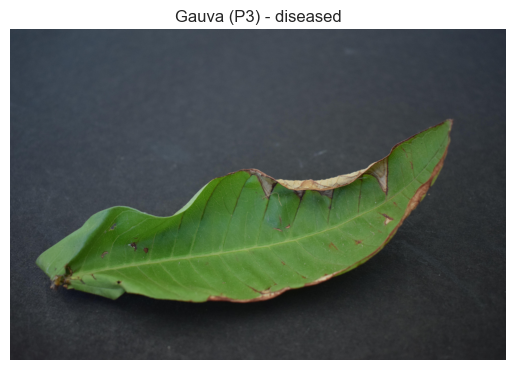

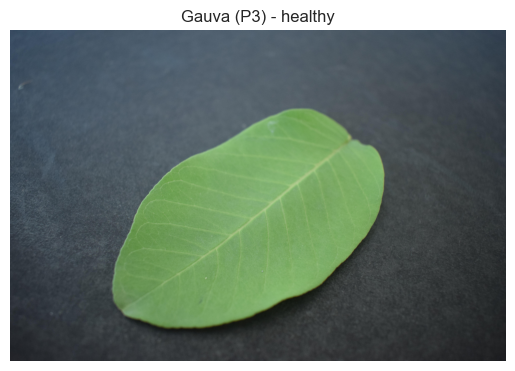

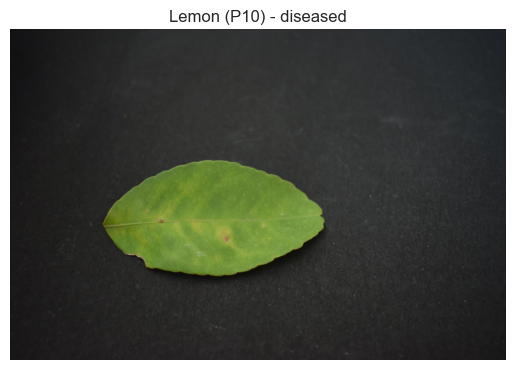

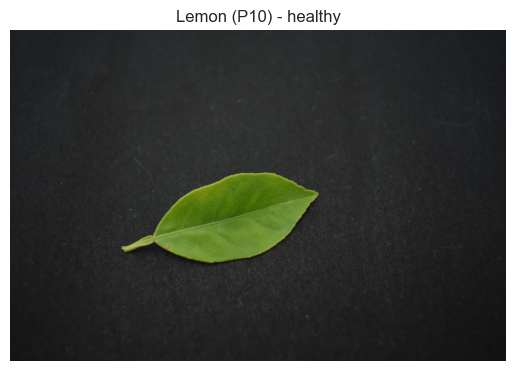

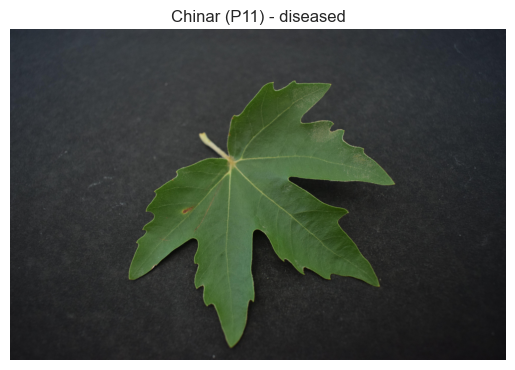

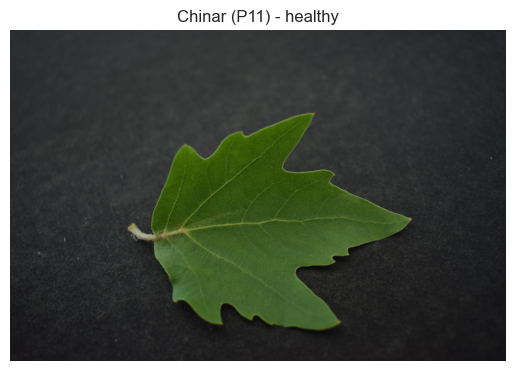

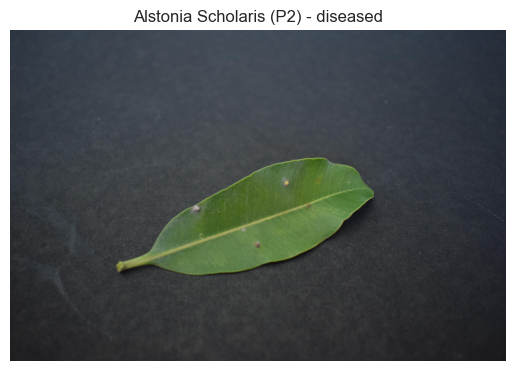

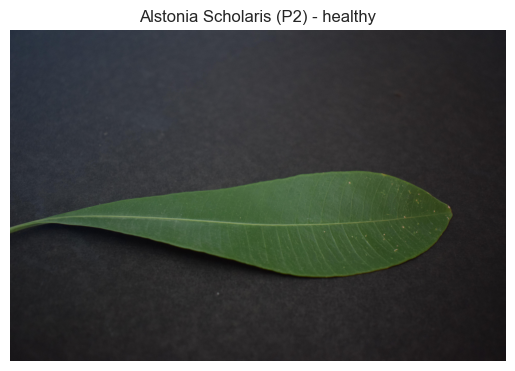

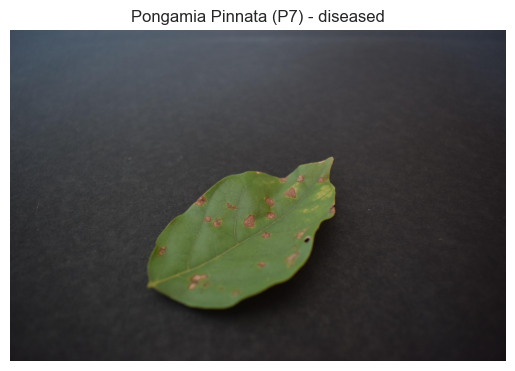

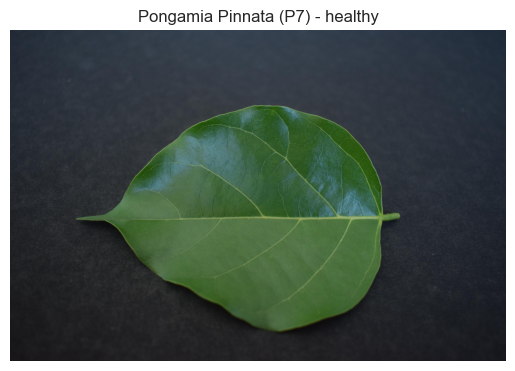

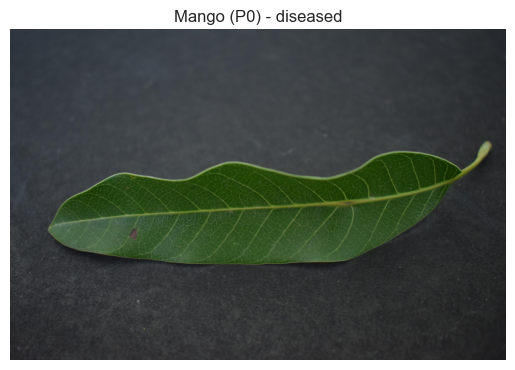

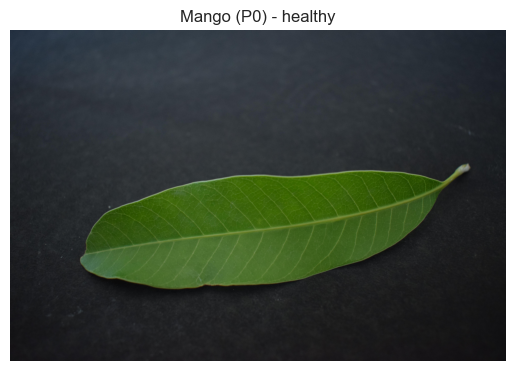

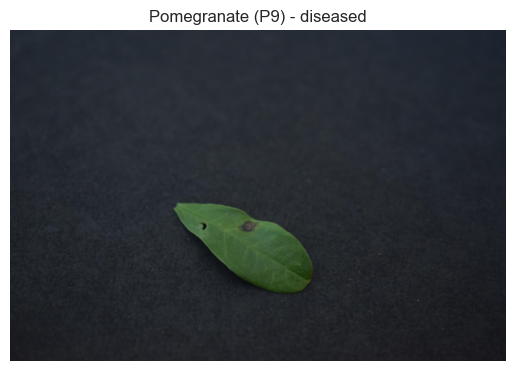

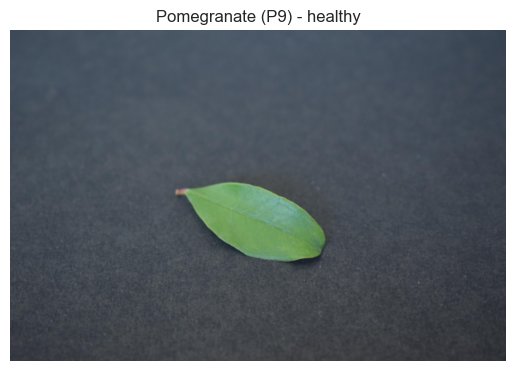

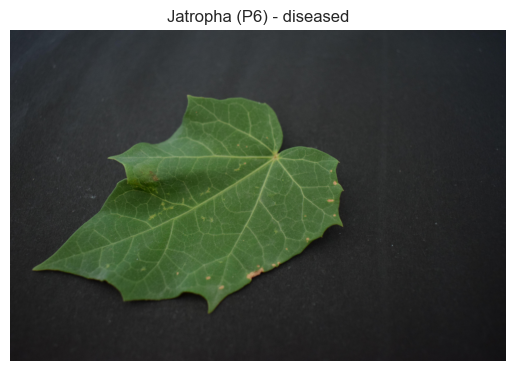

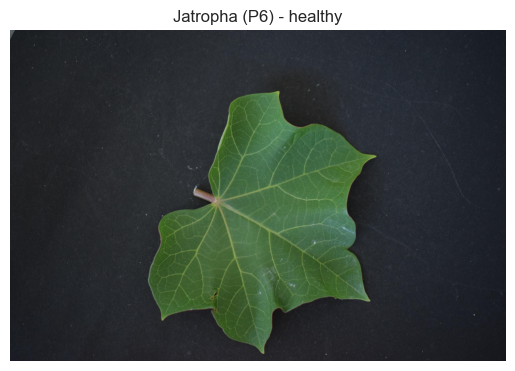

In [15]:
DATASET_DIR = './leaf_dataset_small'
categories = os.listdir(DATASET_DIR)

# showing sample images from each sub-category
for category in os.listdir(DATASET_DIR):
    category_path = os.path.join(DATASET_DIR, category)
    
    # Loop through each subfolder (diseased and healthy)
    for subfolder in os.listdir(category_path):
        subfolder_path = os.path.join(category_path, subfolder)
        
        # Get a random image from the subfolder
        image_path = os.path.join(subfolder_path, random.choice(os.listdir(subfolder_path)))
        
        # Load the image and display it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(f"{category} - {subfolder}")
        plt.axis('off')
        plt.show()

KS Statistic and P-value test for the dataset

In [7]:
from scipy.stats import ks_2samp

# Get a list of all category directories
categories_dir = os.listdir(DATASET_DIR)

# Define the colors for the healthy and diseased histograms
colors = ["blue", "red"]

# Loop through each category directory
for category in categories_dir:
    # Get a list of all healthy and diseased directories within the category
    healthy_dir = os.path.join(DATASET_DIR, category, "healthy")
    diseased_dir = os.path.join(DATASET_DIR, category, "diseased")
    
    # Get a list of all image files within the healthy and diseased directories
    healthy_files = os.listdir(healthy_dir)
    diseased_files = os.listdir(diseased_dir)
    
    # Initialize the histograms
    healthy_hist = np.zeros((256, 1))
    diseased_hist = np.zeros((256, 1))
    
    # Loop through each healthy image and add its color values to the histogram
    for file in healthy_files:
        img_path = os.path.join(healthy_dir, file)
        img = cv2.imread(img_path)
        color = ["b", "g", "r"]
        for i, col in enumerate(color):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            if col == "r":
                healthy_hist += hist * 0.3
            elif col == "g":
                healthy_hist += hist * 0.59
            else:
                healthy_hist += hist * 0.11
                
    # Loop through each diseased image and add its color values to the histogram
    for file in diseased_files:
        img_path = os.path.join(diseased_dir, file)
        img = cv2.imread(img_path)
        color = ["b", "g", "r"]
        for i, col in enumerate(color):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            if col == "r":
                diseased_hist += hist * 0.3
            elif col == "g":
                diseased_hist += hist * 0.59
            else:
                diseased_hist += hist * 0.11
    
    # Normalize the histograms
    healthy_hist_norm = cv2.normalize(healthy_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    diseased_hist_norm = cv2.normalize(diseased_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    
    # Test for significance using the Kolmogorov-Smirnov test
    ks_statistic, p_value = ks_2samp(healthy_hist_norm.ravel(), diseased_hist_norm.ravel())
    print(f"KS Statistic for {category}: {ks_statistic}, P-value: {p_value}")


KS Statistic for Arjun (P1): 0.19921875, P-value: 7.373125210370964e-05
KS Statistic for Jamun (P5): 0.10546875, P-value: 0.11597166955800203
KS Statistic for Gauva (P3): 0.109375, P-value: 0.09352059695648762
KS Statistic for Lemon (P10): 0.234375, P-value: 1.4087570293389547e-06
KS Statistic for Chinar (P11): 0.23828125, P-value: 8.710295828089436e-07
KS Statistic for Alstonia Scholaris (P2): 0.06640625, P-value: 0.6259619399099061
KS Statistic for Pongamia Pinnata (P7): 0.08984375, P-value: 0.25309913262062794
KS Statistic for Mango (P0): 0.15234375, P-value: 0.005196699965937483
KS Statistic for Pomegranate (P9): 0.1640625, P-value: 0.0019990109323188314
KS Statistic for Jatropha (P6): 0.1953125, P-value: 0.00010988104075649344


In [8]:
from scipy.stats import ks_2samp

# Get a list of all category directories
categories_dir = os.listdir(DATASET_DIR)

# Define the colors for the healthy and diseased histograms
colors = ["r", "g", "b"]

# Initialize the histograms
healthy_hist = np.zeros((256, 3))
diseased_hist = np.zeros((256, 3))

# Loop through each category directory
for category in categories_dir:
    # Get the healthy and diseased directories within the category
    healthy_dir = os.path.join(DATASET_DIR, category, "healthy")
    diseased_dir = os.path.join(DATASET_DIR, category, "diseased")
    
    # Loop through each healthy image and add its color values to the histogram
    for file in os.listdir(healthy_dir):
        img_path = os.path.join(healthy_dir, file)
        img = cv2.imread(img_path)
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            if col == "r":
                healthy_hist[:, i] += hist.ravel() * 0.3
            elif col == "g":
                healthy_hist[:, i] += hist.ravel() * 0.59
            else:
                healthy_hist[:, i] += hist.ravel() * 0.11
    
    # Loop through each diseased image and add its color values to the histogram
    for file in os.listdir(diseased_dir):
        img_path = os.path.join(diseased_dir, file)
        img = cv2.imread(img_path)
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            if col == "r":
                diseased_hist[:, i] += hist.ravel() * 0.3
            elif col == "g":
                diseased_hist[:, i] += hist.ravel() * 0.59
            else:
                diseased_hist[:, i] += hist.ravel() * 0.11
    
# Normalize the histograms
healthy_hist_norm = cv2.normalize(healthy_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
diseased_hist_norm = cv2.normalize(diseased_hist, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Test for significance using the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(healthy_hist_norm.ravel(), diseased_hist_norm.ravel())
print(f"KS Statistic for Color Distribution Comparison: {ks_statistic}, P-value: {p_value}")


KS Statistic for Color Distribution Comparison: 0.10416666666666667, P-value: 0.0004761061432370767


Plotting colour histogram

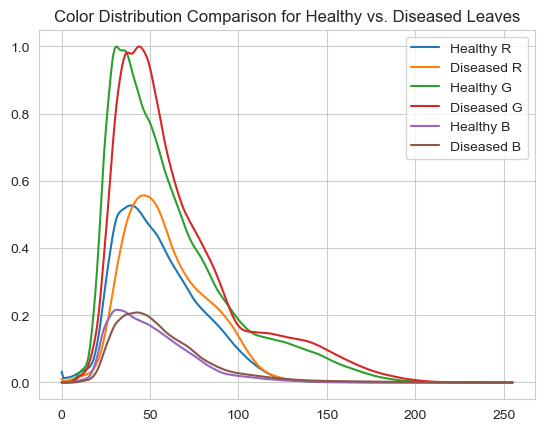

In [38]:

pic_color=["R","G","B"]
for i in range(healthy_hist_norm.shape[1]):
    plt.plot(healthy_hist_norm[:,i],label="Healthy "+pic_color[i])
    plt.plot(diseased_hist_norm[:,i],label="Diseased "+pic_color[i])
plt.title("Color Distribution Comparison for Healthy vs. Diseased Leaves")
plt.legend()
plt.show()

